# Correlations on data

In [55]:
# Autoreload allows the notebook to dynamically load code: if we update some helper functions *outside* of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import pandas as pd
import numpy as np
import re
import unicodedata

import os
import sys
sys.path.append(os.path.abspath('../src'))
from utils import *

import seaborn as sb
import matplotlib.pyplot as plt

We load the dataset from a CSV file and display the first few rows to get an initial understanding of the data. This helps us verify that the data has been loaded correctly and gives us a glimpse of its structure and contents.

In [57]:
csv_file = "../data/cyclists.csv"
cyclists_dataset = pd.read_csv(csv_file)
cyclists_dataset.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [58]:
csv_file = "../data/races.csv"
races_dataset = pd.read_csv(csv_file)
races_dataset.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


Create dataset from the union of the cyclists and the races data 

In [59]:
# Create union of two datasets, merging them considering the url of the cyclist
merged_dataset = pd.merge(cyclists_dataset, races_dataset, left_on='_url', right_on='cyclist', how='inner')

# Modify name column of the cyclist url in '_url_cyclist', and name column of the race url in '_url_race'
merged_dataset = merged_dataset.rename(columns={'_url_x': '_url_cyclist', '_url_y': '_url_race'})
# Modify name column of the cyclist name in 'name_cyclist', and name column of the race name in 'name_race'
merged_dataset = merged_dataset.rename(columns={'name_x': 'name_cyclist', 'name_y': 'name_race'})
# Take only the year-month-day part of 'date' (delete the time)
merged_dataset['date'] = merged_dataset['date'].str.split(' ').str[0]

merged_dataset.head()


,_url_cyclist,name_cyclist,birth_year,weight,height,nationality,_url_race,name_race,points,uci_points,...,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy,vuelta-a-espana/1989/stage-1,Vuelta a España,80.0,NaN,...,NaN,1989-04-24,110,bruno-surra,25.0,True,False,False,NaN,15.0
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1997/stage-2,Tour de France,100.0,NaN,...,NaN,1997-07-07,132,gerard-rue,32.0,True,False,False,denmark-1991,0.0
2,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-1,Tour de France,100.0,NaN,...,NaN,1990-07-01,66,gerard-rue,25.0,True,False,False,france-1978,635.0
3,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1992/stage-7,Tour de France,100.0,NaN,...,NaN,1992-07-11,35,gerard-rue,27.0,True,False,False,france-1978,65.0
4,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-9,Tour de France,100.0,NaN,...,NaN,1990-07-09,41,gerard-rue,25.0,True,False,False,france-1978,37.0


## Cyclists

In [65]:
normalized_dataset_cyclists, normalization_scalers_cyclists = center_and_scale(cyclists_dataset)
corr_cyclists = correlations(normalized_dataset_cyclists)
corr_cyclists

,birth_year,weight,height,correlation_type
birth_year,1.000000,-0.063740,0.094976,kendall
weight,-0.063740,1.000000,0.539760,kendall
height,0.094976,0.539760,1.000000,kendall
birth_year,1.000000,-0.104242,0.154252,pearson
weight,-0.104242,1.000000,0.720732,pearson
height,0.154252,0.720732,1.000000,pearson
birth_year,1.000000,-0.091220,0.137001,spearman
weight,-0.091220,1.000000,0.705189,spearman
height,0.137001,0.705189,1.000000,spearman


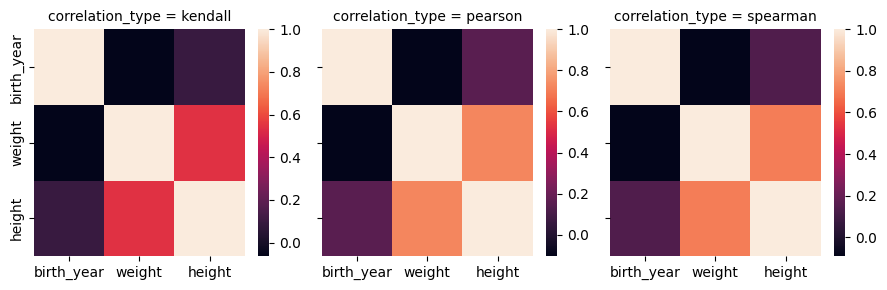

In [66]:
g = sb.FacetGrid(corr_cyclists, col="correlation_type")
g.map_dataframe(lambda data, color: sb.heatmap(data[data.columns[:-1]]))

## Races

In [67]:
normalized_dataset_races, normalization_scalers_races = center_and_scale(races_dataset)
corr_races = correlations(normalized_dataset_races)
corr_races

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta,correlation_type
points,1.000000,0.486830,0.283637,0.044915,-0.097831,0.387373,0.153829,0.011531,-0.005476,0.068592,kendall
uci_points,0.486830,1.000000,0.098587,0.046858,-0.000465,0.007000,0.066502,-0.023719,0.007526,0.070373,kendall
length,0.283637,0.098587,1.000000,0.285099,0.017441,0.064082,-0.095313,-0.015373,-0.002381,0.029217,kendall
climb_total,0.044915,0.046858,0.285099,1.000000,0.578126,0.009066,-0.079710,-0.023858,0.005533,0.356194,kendall
profile,-0.097831,-0.000465,0.017441,0.578126,1.000000,-0.092412,-0.020977,-0.018424,0.005635,0.420183,kendall
startlist_quality,0.387373,0.007000,0.064082,0.009066,-0.092412,1.000000,0.218390,0.097527,0.033589,0.032290,kendall
average_temperature,0.153829,0.066502,-0.095313,-0.079710,-0.020977,0.218390,1.000000,0.015593,0.033887,0.023630,kendall
position,0.011531,-0.023719,-0.015373,-0.023858,-0.018424,0.097527,0.015593,1.000000,0.006378,0.296542,kendall
cyclist_age,-0.005476,0.007526,-0.002381,0.005533,0.005635,0.033589,0.033887,0.006378,1.000000,-0.002685,kendall
delta,0.068592,0.070373,0.029217,0.356194,0.420183,0.032290,0.023630,0.296542,-0.002685,1.000000,kendall


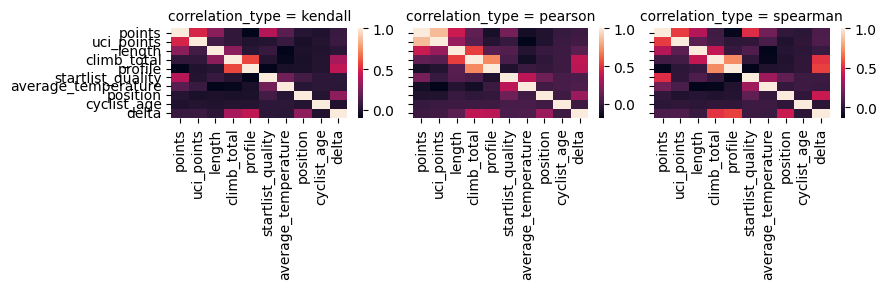

In [70]:
g = sb.FacetGrid(corr_races, col="correlation_type")
g.map_dataframe(lambda data, color: sb.heatmap(data[data.columns[:-1]]))

## Cyclists & Races

In [71]:
normalized_dataset_races, normalization_scalers_races = center_and_scale(merged_dataset)
corr_merged = correlations(normalized_dataset_races)
corr_merged

,birth_year,weight,height,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta,correlation_type
birth_year,1.000000,-0.048929,0.084952,-0.188972,0.353998,-0.063056,0.047721,0.116732,-0.143515,-0.059271,0.086365,-0.144005,0.080044,kendall
weight,-0.048929,1.000000,0.562114,0.055047,0.032572,0.032902,-0.022498,-0.032965,0.039218,0.048094,0.082316,0.038046,0.070877,kendall
height,0.084952,0.562114,1.000000,0.011322,0.047010,0.009793,-0.004439,-0.001419,0.006751,0.021196,0.068431,-0.008778,0.057818,kendall
points,-0.188972,0.055047,0.011322,1.000000,0.486830,0.283637,0.044915,-0.097831,0.387373,0.153829,0.011531,-0.005476,0.068592,kendall
uci_points,0.353998,0.032572,0.047010,0.486830,1.000000,0.098587,0.046858,-0.000465,0.007000,0.066502,-0.023719,0.007526,0.070373,kendall
length,-0.063056,0.032902,0.009793,0.283637,0.098587,1.000000,0.285099,0.017441,0.064082,-0.095313,-0.015373,-0.002381,0.029217,kendall
climb_total,0.047721,-0.022498,-0.004439,0.044915,0.046858,0.285099,1.000000,0.578126,0.009066,-0.079710,-0.023858,0.005533,0.356194,kendall
profile,0.116732,-0.032965,-0.001419,-0.097831,-0.000465,0.017441,0.578126,1.000000,-0.092412,-0.020977,-0.018424,0.005635,0.420183,kendall
startlist_quality,-0.143515,0.039218,0.006751,0.387373,0.007000,0.064082,0.009066,-0.092412,1.000000,0.218390,0.097527,0.033589,0.032290,kendall
average_temperature,-0.059271,0.048094,0.021196,0.153829,0.066502,-0.095313,-0.079710,-0.020977,0.218390,1.000000,0.015593,0.033887,0.023630,kendall


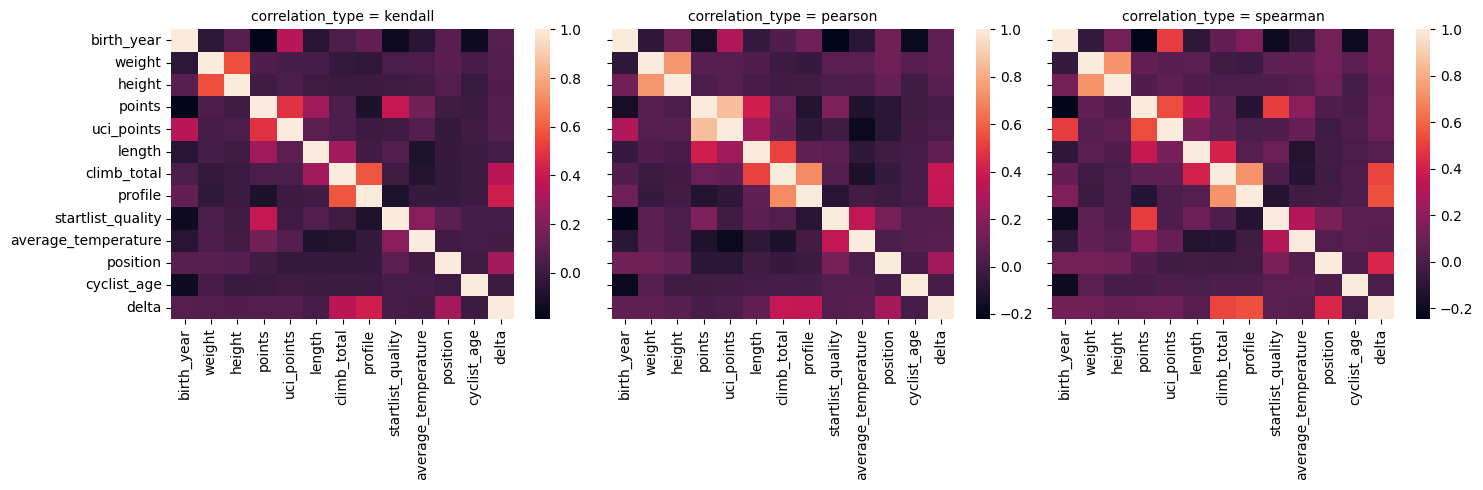

In [76]:
g = sb.FacetGrid(corr_merged, col="correlation_type", height=5)
g.map_dataframe(lambda data, color: sb.heatmap(data[data.columns[:-1]]))